# Task 2: Visualizing fire scars through false color

Leilanie Rubinstein

[link to Github repository](https://github.com/leirubinstein/eds220-hwk4)

## About

**Purpose:**
Here we use historical fire perimeter data from CalFire to obtain the perimeter of the [2017 Thomas Fire](https://www.fire.ca.gov/incidents/2017/12/4/thomas-fire/).

**Highlights:**
- Cleaning data
- Label-based selection
- Geospatial file creation

**Dataset Description:**
California's Fire and Resource Assessment Program (FRAP) maintains a comprehensive database of historical fire perimeters throughout the state, covering both public and private lands. This GIS dataset is updated annually through a collaborative effort between FRAP and several federal agencies - the U.S. Forest Service Region 5, Bureau of Land Management, National Park Service, and Fish and Wildlife Service.

**References:**
Fire Resource and Assessment Program. (2024). *Historical Fire Perimeters* CalFire. https://www.fire.ca.gov/what-we-do/fire-resource-assessment-program/fire-perimeters

[File download link](https://34c031f8-c9fd-4018-8c5a-4159cdff6b0d-cdn-endpoint.azureedge.net/-/media/calfire-website/what-we-do/fire-resource-assessment-program---frap/gis-data/april-2023/fire23-1gdb.zip'?rev=852b1296fecc483380284f7aad868659)

## Fire perimeter data retrieval and selection

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import rioxarray as rioxr

In [3]:
# Load fire perimeter data
fire_perimeter = gpd.read_file(os.path.join('data',
                                            'fire23_1.gdb'))
fire_perimeter.head()
fire_perimeter.columns = fire_perimeter.columns.str.lower()

In [24]:
print(f"Fire Perimeter CRS: {fire_perimeter.crs} \nIs this projected?: {fire_perimeter.crs.is_projected}")

Fire Perimeter CRS: EPSG:3310 
Is this projected?: True


Here we obtain the coordinate reference system (EPSG:3310) of the fire perimeter data. This CRS is projected.

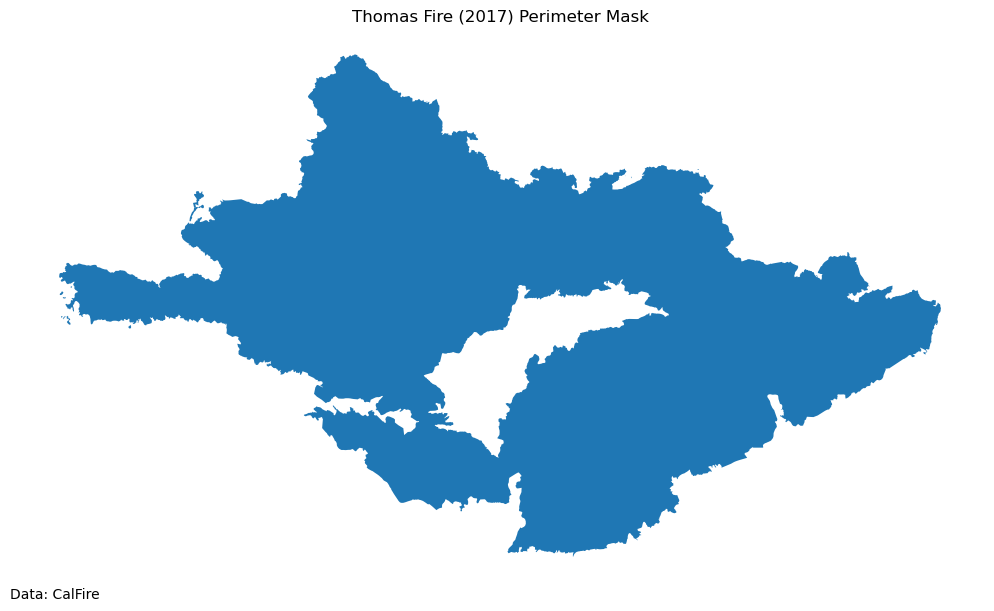

In [36]:
# Filter to the 2017 Thomas Fire
thomasfire = fire_perimeter.loc[(fire_perimeter['fire_name'] == 'THOMAS') & 
                                (fire_perimeter['year_'] == 2017)]

# Plot the perimeter
fig, ax = plt.subplots(figsize = (10,8))
ax.axis('off')
thomasfire.plot(ax=ax)
plt.tight_layout()
plt.subplots_adjust(bottom = 0.05)
ax.set_title('Thomas Fire (2017) Perimeter Mask')
plt.figtext(0.01, 0.15, "Data: CalFire", ha="left", fontsize=10)
plt.show()

In [55]:
# Save file to the data folder in `.geojson` format.
thomasfire.to_file('data/thomasfire.geojson', driver='GeoJSON')

GeoJSON is an open standard format that can represent a variety of geometries.